<a href="https://colab.research.google.com/github/Mohitkhatri1902/Yes-Bank-Closing-Price-Prediction/blob/main/Mohit_ML_Submission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Yes Bank Stock Closing Price Prediction**

(Supervised - Regression)

***Project By # Mohit Khatri # ***

Data Science Trainee at AlmaBetter



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**  Mohit Khatri


# **Project Summary -**

The Capstone Project revolves around predicting the closing stock prices of Yes bank using regression models, with the primary objective of developing an accurate and reliable forecasting tool for investors and stakeholders. Employing historical data and leveraging regression analysis, the project aims to explore various regression models to identify the most effective one for predicting Yes Bank's closing stock prices.

Regression analysis, a statistical method, forms the foundation of the project. It harnesses the power of independent variables to predict the value of a dependent variable, in this context, the closing stock price. By utilizing a combination of features such as historical stock prices, market indicators, and financial metrics, the regression models seek to capture the underlying patterns and trends influencing Yes Bank's stock performance.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank is a well-Known Indian bank. The problem statement for developing a Yes bank stock closing price prediction ML model is to create an accurate and reliable forecasting model. The model should be trained on a subset of historical data and validated on another subset to ensure that it can accurately predict future stock prices. The ultimate objective is to create a robust and accurate model that can help to predict Yes Bank stocks Closing price.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [340]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

### Dataset Loading

In [342]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [343]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Project/data_YesBank_StockPrices.csv'
YesBank_df = pd.read_csv(file_path)

### Dataset First View

In [344]:
# Dataset First Look
YesBank_df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [345]:
# Dataset Rows & Columns count
YesBank_df.shape

(185, 5)

### Dataset Information

In [346]:
# Dataset Info
YesBank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [347]:
# Dataset Duplicate Value Count
YesBank_df[YesBank_df.duplicated()==True]

,Date,Open,High,Low,Close


#### Missing Values/Null Values

In [348]:
# Missing Values/Null Values Count
YesBank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

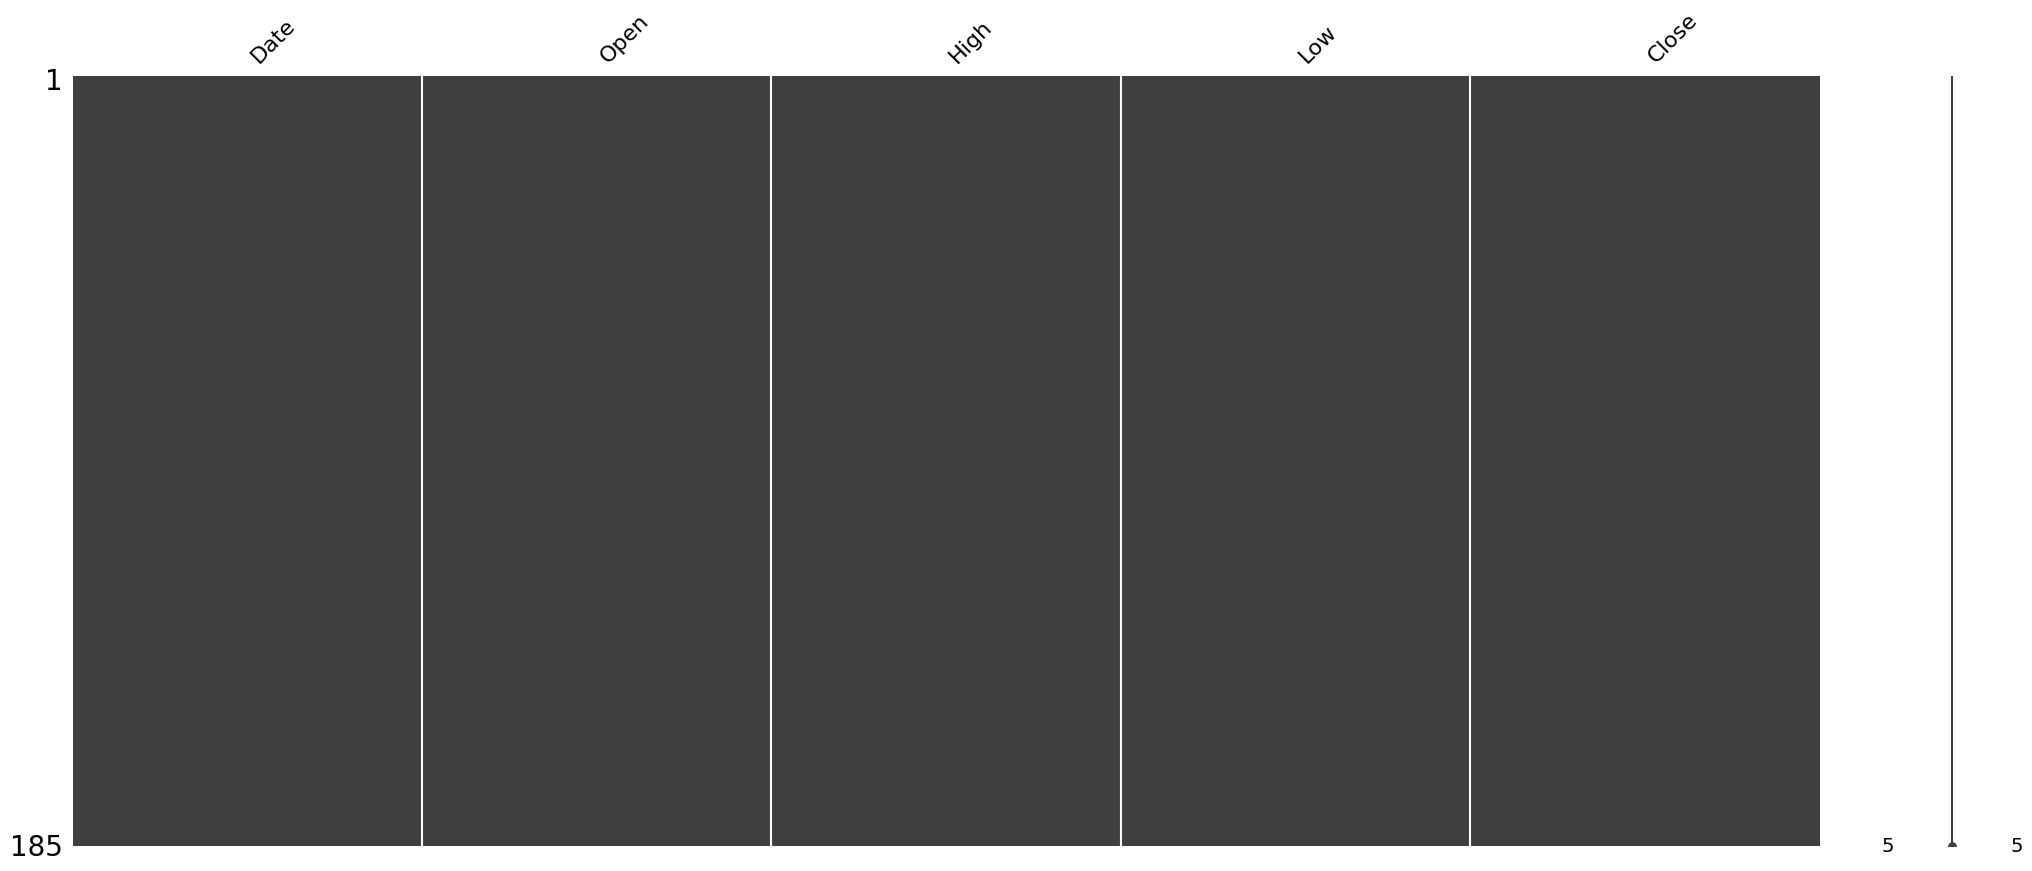

In [349]:
# Visualizing the missing values
msno.matrix(YesBank_df)

***### What did you know about your dataset?***



*   **We have total of 185 entries and 5 columns.**
*   **No Null Values.**

*   **Date Column is of object datatype we have to convert it into datetime.**


In [350]:
# prompt: Using dataframe YesBank_df: Check Unique Values for each variable.

for column in YesBank_df.columns:
  unique_values = YesBank_df[column].unique()
  print(f"Column: {column}, Unique values: {len(unique_values)}")


Column: Date, Unique values: 185
Column: Open, Unique values: 183
Column: High, Unique values: 184
Column: Low, Unique values: 183
Column: Close, Unique values: 185


## ***2. Understanding Your Variables***

In [351]:
# Dataset Columns
YesBank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [353]:
# Dataset Describe
YesBank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description


***There are 5 variable in this data.***


**1.   Date : It has Month & Year**

**2.   Open : Opening Stock Price of respective Month**

**3.   High : Highest stock price of respective month**

**4.    Low : Lowest Stock price for respective Month**

**5.  Close : Closing price of respective Month**

**Independent Variable : 1 To 4**

**Dependent variable : 5**



### Check Unique Values for each variable.

In [354]:
# Check Unique Values for each variable.
YesBank_df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [355]:
for column in YesBank_df.columns:
  unique_values = YesBank_df[column].unique()
  print(f"Column: {column}, Unique values: {len(unique_values)}")

Column: Date, Unique values: 185
Column: Open, Unique values: 183
Column: High, Unique values: 184
Column: Low, Unique values: 183
Column: Close, Unique values: 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [356]:
# Write your code to make your dataset analysis ready.
YesBank_df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [357]:
# we can see, Date column has the object dataype.
# so we need to convert this into date format.
YesBank_df['Date'] = pd.to_datetime(YesBank_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [358]:
YesBank_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [359]:
YesBank_df.set_index('Date', inplace=True)
YesBank_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [360]:
YesBank_df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

### What all manipulations have you done and insights you found?

***Since we are trying to track variation in stock price on different dates, it make sense to set this column as an index.
we can see from the above dataframe, all the columns has numerical data. There os no categorical data.***

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

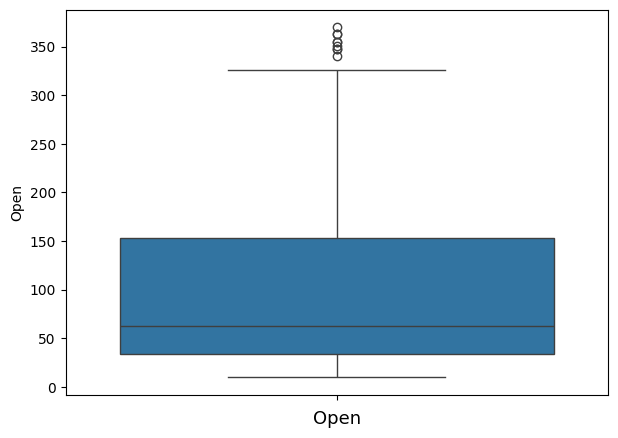

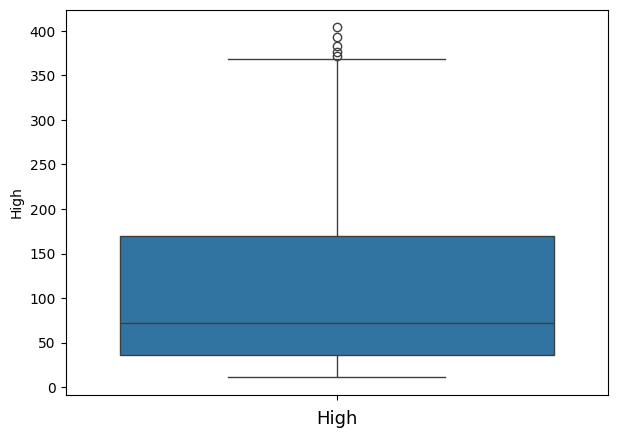

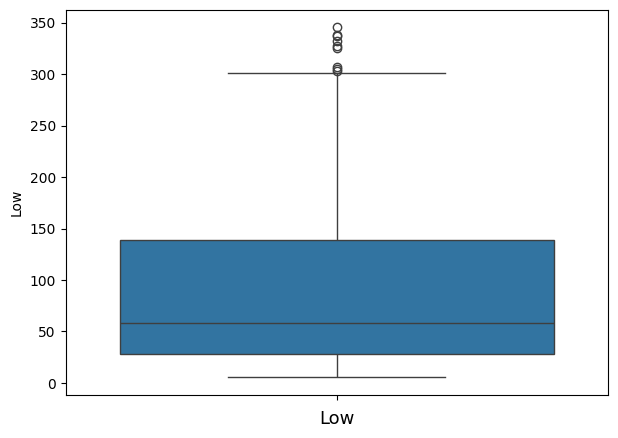

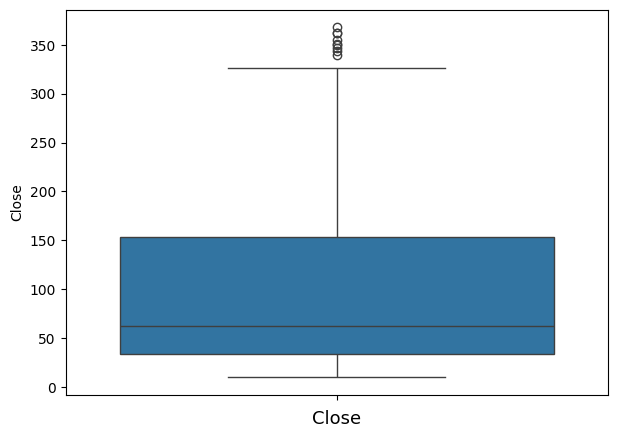

In [361]:
# Chart - 1 visualization code
#Checking all features for presence of outliers.
for col in YesBank_df.columns:
  plt.figure(figsize=(7,5))
  sns.boxplot(YesBank_df[col])
  plt.xlabel(col, fontsize=13)
  plt.show

##### 2. What is/are the insight(s) found from the chart?

**As we can see there are some outliers present in our data. We will need to deal with these before proced to modeling.**

#### Chart - 2

In [362]:
# Chart - 2 visualization code

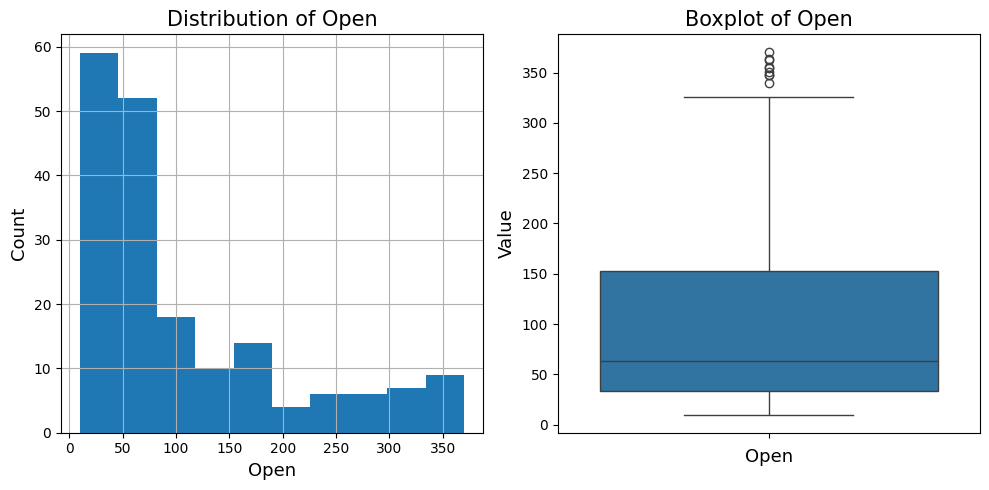

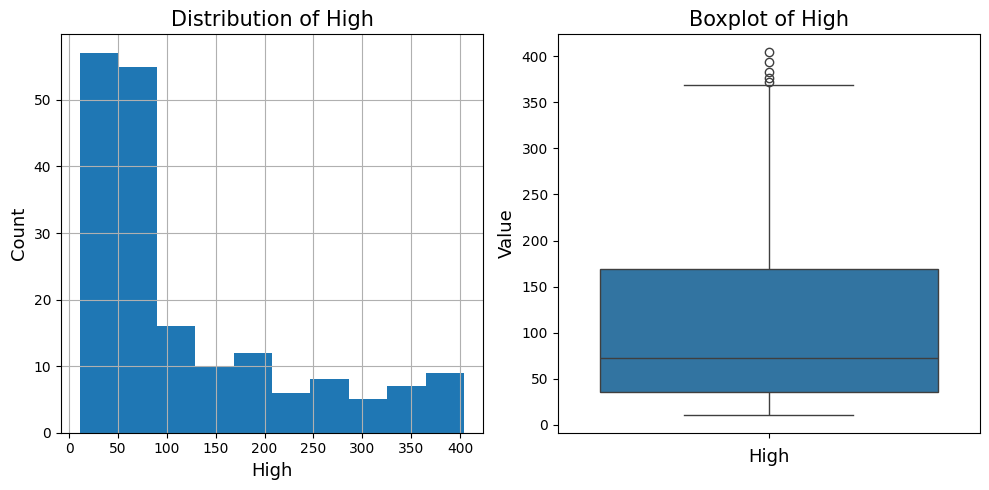

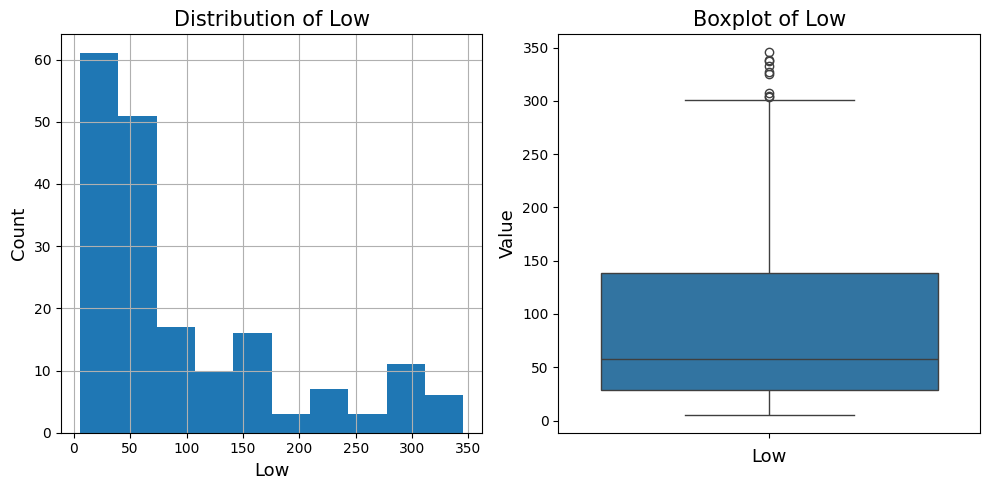

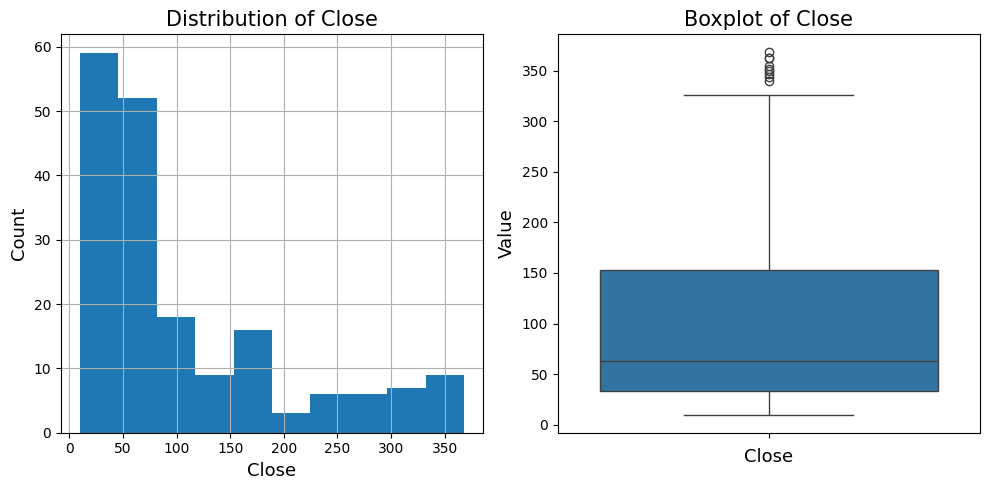

In [363]:
# Data Distribution and mean and median of each single Indpendent variable

for col in YesBank_df.columns:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    YesBank_df[col].hist(bins=10)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.title('Distribution of {}'.format(col), fontsize=15)
    plt.subplot(1, 2, 2)
    sns.boxplot(YesBank_df[col])
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Value', fontsize=13)
    plt.title('Boxplot of {}'.format(col), fontsize=15)
    plt.tight_layout()
    plt.show()


#### Chart - 3

In [364]:
# Chart - 3 visualization code

<ipython-input-365-8c428c762b27>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YesBank_df['Close'])


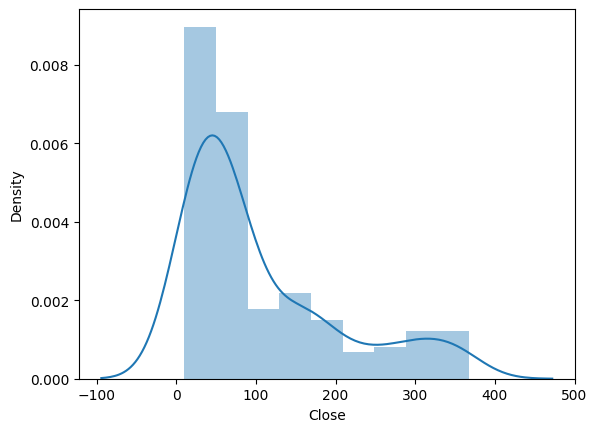

In [365]:
# Doing Visualisation of Distributed Data for Close column.

sns.distplot(YesBank_df['Close'])
plt.show()


<ipython-input-366-2fab7fcaeeae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(YesBank_df['Close']))


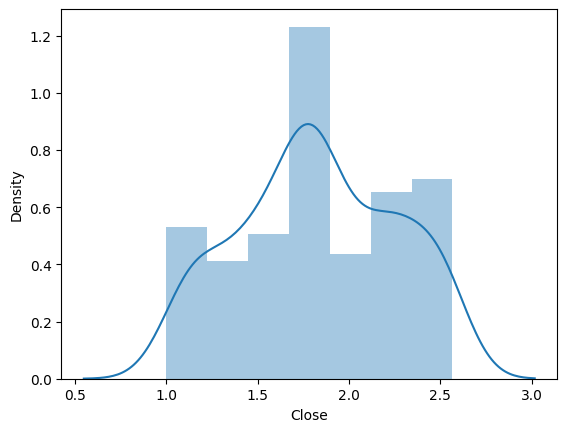

In [366]:
# Use log tranformation for above chart

sns.distplot(np.log10(YesBank_df['Close']))
plt.show()


##### 1. Why did you pick the specific chart?

**Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide useful insights into its distribution, shape and potential outliers.**

**By visualizing the distribution of the target variable, we can gain a better understanding of its.**

**1. Central tendency(i.e, the mean, median and mode)**

**2. Spread(i.e., the range, variance and standard deviation)**

**3. Skewness (i.e., whether it is symmetric or skewed)**

**and any potential outliers.**

**This information can be helpful in selecting an appropriate ML algorithm for predicting the target variable, as well as identifying any potentioal issues with the data that may need to be addressed before training the model.**

##### 2. What is/are the insight(s) found from the chart?

**Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide several insights, including:**

**1. The Shape of the distribution: the shape of the distribution is skewed right(i.e., positively skewed). A skewed distribution suggests that the closing price is more concentrated o one side of the mean. So for having better model we need to make our target variable symmetrically distributed by using log transformation.**

**2. The presence of Outliers: Outliers are data points that are significantly different from the rest of the data. By examining the distribution plot, we can identify any potential outliers that may need to be addressed before training the model.**

#### Chart - 4

In [367]:
# Chart - 4 visualization code

<ipython-input-368-a332d54cc611>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YesBank_df['Open'])


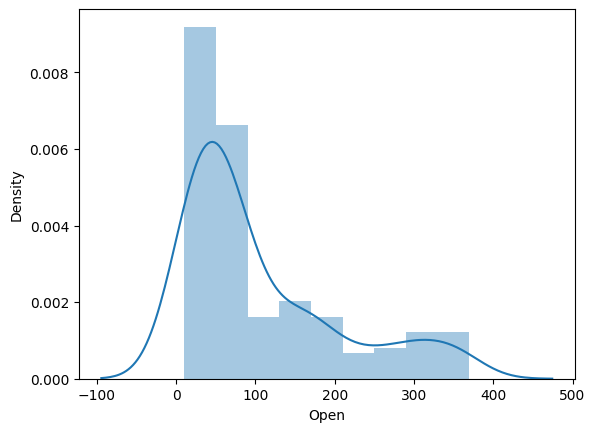

In [368]:
sns.distplot(YesBank_df['Open'])
plt.show()

<ipython-input-369-d74e14987ac4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(YesBank_df['Open']))


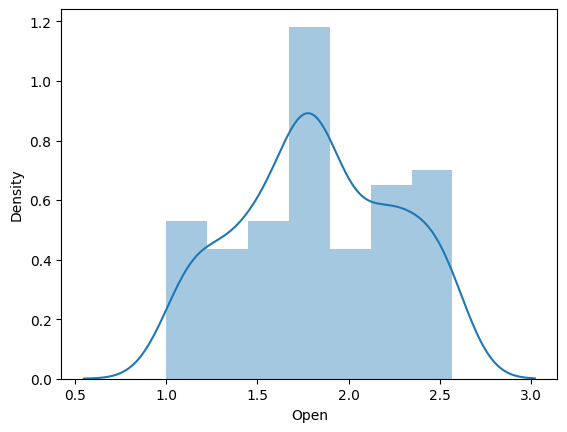

In [369]:
sns.distplot(np.log10(YesBank_df['Open']))
plt.show()

##### 1. Why did you pick the specific chart?

**Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide useful insights into its distribution, shape and potential outliers.**

**By visualizing the distribution of the target variable, we can gain a better understanding of its.**

**1. Central tendency(i.e, the mean, median and mode)**

**2. Spread(i.e., the range, variance and standard deviation)**

**3. Skewness (i.e., whether it is symmetric or skewed)**

**and any potential outliers.**

**This information can be helpful in selecting an appropriate ML algorithm for predicting the target variable, as well as identifying any potentioal issues with the data that may need to be addressed before training the model.**

##### 2. What is/are the insight(s) found from the chart?

**Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide several insights, including:**

**1. The Shape of the distribution: the shape of the distribution is skewed right(i.e., positively skewed). A skewed distribution suggests that the closing price is more concentrated o one side of the mean. So for having better model we need to make our target variable symmetrically distributed by using log transformation.**

**2. The presence of Outliers: Outliers are data points that are significantly different from the rest of the data. By examining the distribution plot, we can identify any potential outliers that may need to be addressed before training the model.**

#### Chart - 5

<ipython-input-370-76b47e370862>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YesBank_df['High'])


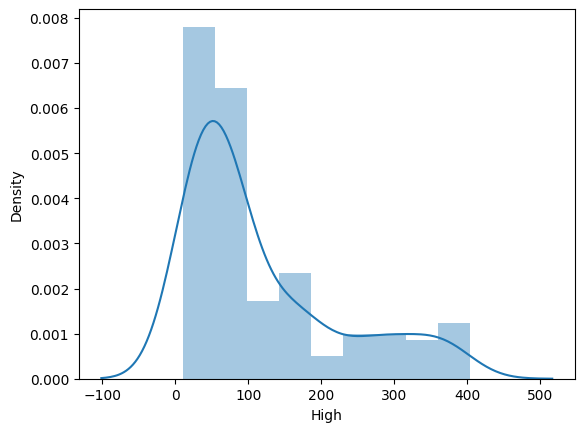

In [370]:
# Chart - 5 visualization code
sns.distplot(YesBank_df['High'])
plt.show()

<ipython-input-371-0d5944e7af2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(YesBank_df['High']))


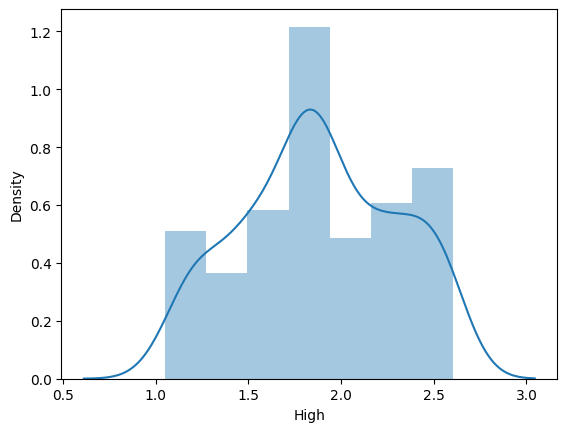

In [371]:
sns.distplot(np.log10(YesBank_df['High']))
plt.show()

##### 1. Why did you pick the specific chart?

**Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide useful insights into its distribution, shape and potential outliers.**

**By visualizing the distribution of the target variable, we can gain a better understanding of its.**

**1. Central tendency(i.e, the mean, median and mode)**

**2. Spread(i.e., the range, variance and standard deviation)**

**3. Skewness (i.e., whether it is symmetric or skewed)**

**and any potential outliers.**

**This information can be helpful in selecting an appropriate ML algorithm for predicting the target variable, as well as identifying any potentioal issues with the data that may need to be addressed before training the model.**

##### 2. What is/are the insight(s) found from the chart?

**Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide several insights, including:**

**1. The Shape of the distribution: the shape of the distribution is skewed right(i.e., positively skewed). A skewed distribution suggests that the closing price is more concentrated o one side of the mean. So for having better model we need to make our target variable symmetrically distributed by using log transformation.**

**2. The presence of Outliers: Outliers are data points that are significantly different from the rest of the data. By examining the distribution plot, we can identify any potential outliers that may need to be addressed before training the model.**

#### Chart - 6

<ipython-input-372-cfbafa78e526>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YesBank_df['Low'])


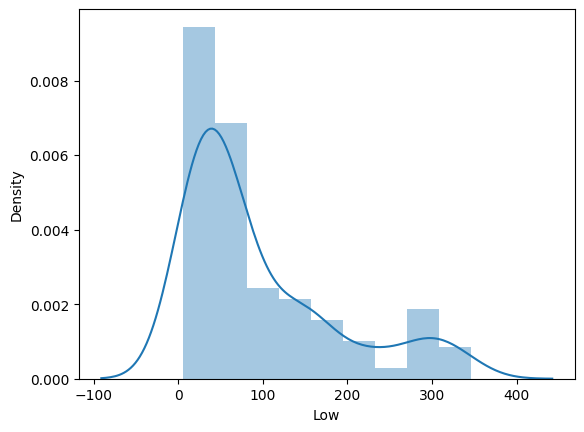

In [372]:
# Chart - 6 visualization code
sns.distplot(YesBank_df['Low'])
plt.show()

<ipython-input-373-b235200f8808>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(YesBank_df['Low']))


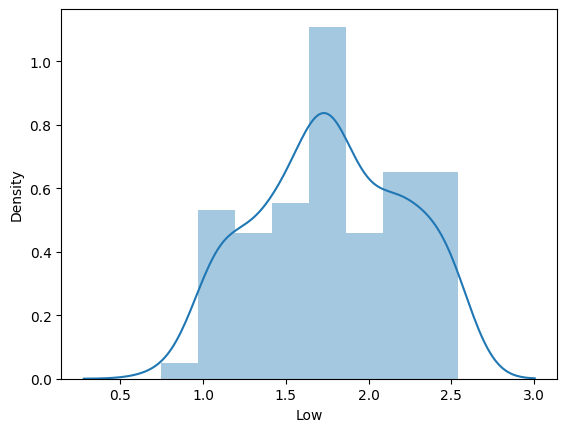

In [373]:
sns.distplot(np.log10(YesBank_df['Low']))
plt.show()

##### 1. Why did you pick the specific chart?

**Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide useful insights into its distribution, shape and potential outliers.**

**By visualizing the distribution of the target variable, we can gain a better understanding of its.**

**1. Central tendency(i.e, the mean, median and mode)**

**2. Spread(i.e., the range, variance and standard deviation)**

**3. Skewness (i.e., whether it is symmetric or skewed)**

**and any potential outliers.**

**This information can be helpful in selecting an appropriate ML algorithm for predicting the target variable, as well as identifying any potentioal issues with the data that may need to be addressed before training the model.**

##### 2. What is/are the insight(s) found from the chart?

**Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide several insights, including:**

**1. The Shape of the distribution: the shape of the distribution is skewed right(i.e., positively skewed). A skewed distribution suggests that the closing price is more concentrated o one side of the mean. So for having better model we need to make our target variable symmetrically distributed by using log transformation.**

**2. The presence of Outliers: Outliers are data points that are significantly different from the rest of the data. By examining the distribution plot, we can identify any potential outliers that may need to be addressed before training the model.**

#### Chart - 7

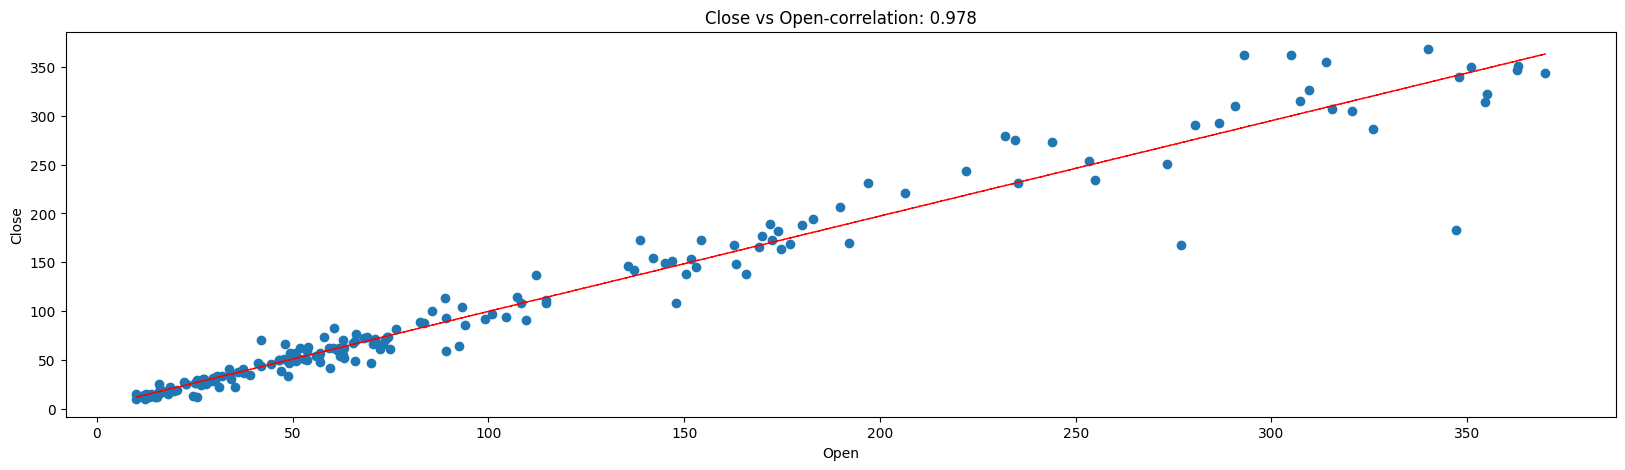

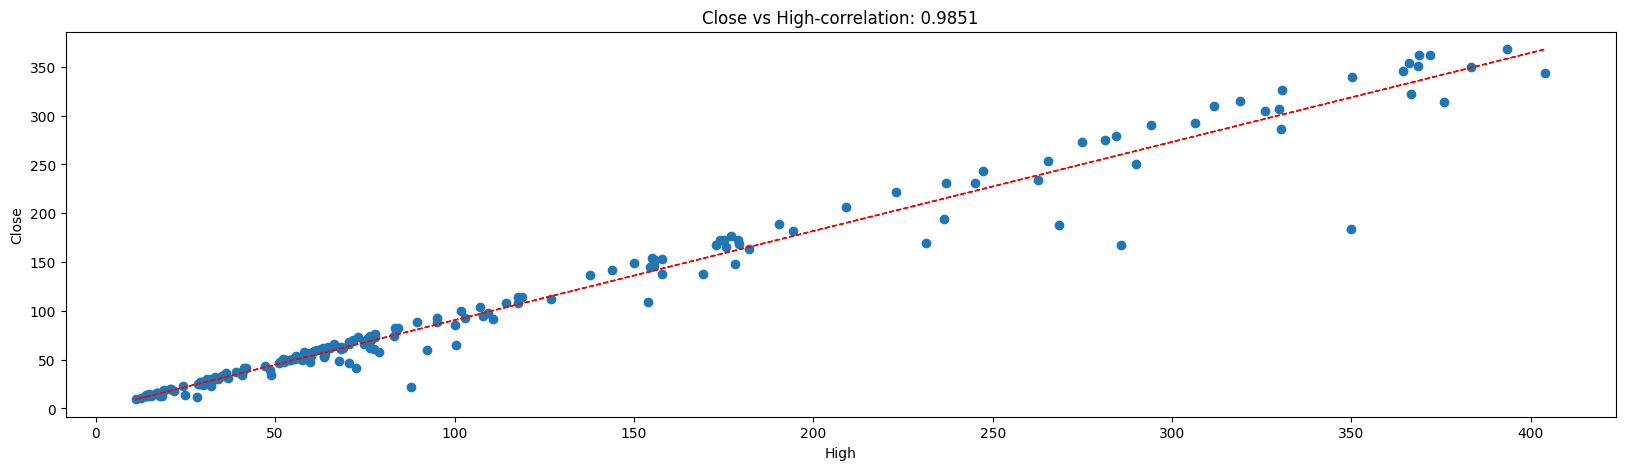

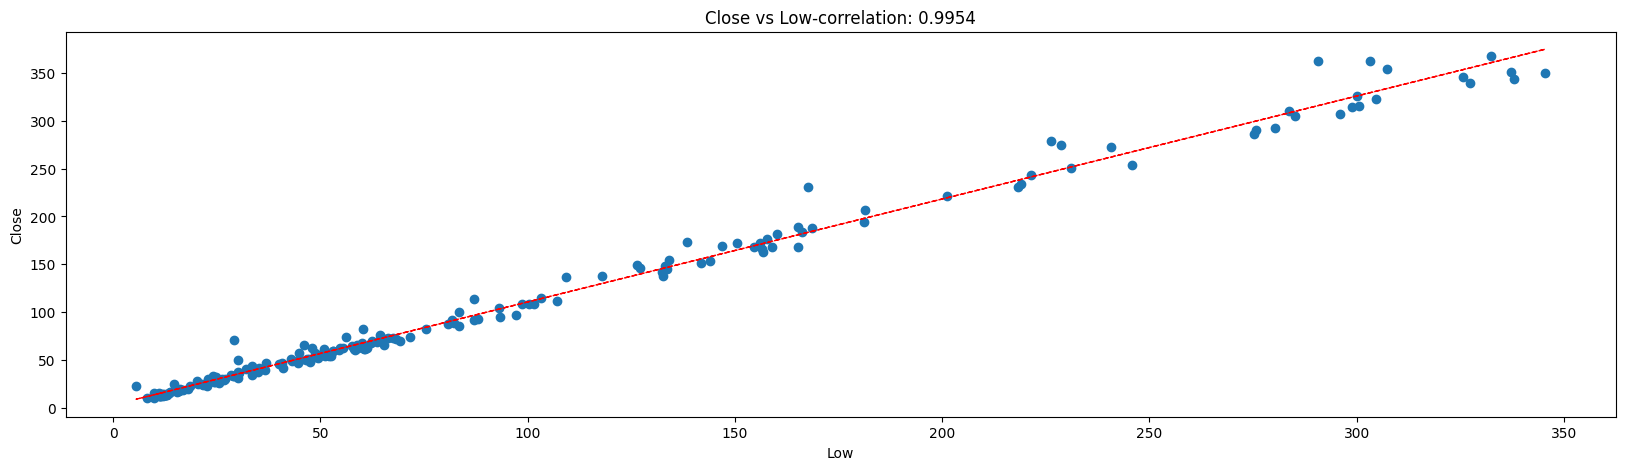

In [374]:
# Chart - 7 visualization code
# Scatter plot to see the relationship between dependent & independent variables
for col in YesBank_df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  feature = YesBank_df[col]
  label = YesBank_df['Close']
  correlation = feature.corr(label)
  ax.set_title('Close vs ' + col + '-correlation: ' + str(round((correlation), 4)))
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.scatter(x=feature, y=label)
  z = np.polyfit(YesBank_df[col], YesBank_df['Close'], 1)
  y_hat = np.poly1d(z)(YesBank_df[col])
  plt.plot(YesBank_df[col], y_hat, "r--", lw=1)
  plt.show()



##### 1. Why did you pick the specific chart?

**A Scatter plot is a common and useful visualization technique to explore the relationship between a dependent variable (i.e., yes Bank stock closing price) and one or more independent variables. In a scatter plot each observation is represented as a point on the graph, with the independent variable plotted on the x-axis and the dependent variable plotted on the y-axis.**

**By examining the scatter plot, we can determine whether there is a strong or weak relationship between the closing price and the independent variable(s), and whether this relationship is linear or nonlinear. This information can be used to inform the selection of appropriate ML algorithms for predicting the closing price, and to identify any potential issues with the data that may need to be addressed before training the ML model.**

##### 2. What is/are the insight(s) found from the chart?

**From all above graphs we can see that all the independent variable are linearly corelated with dependent variable(i.e., Yes Bank stock closing price). We need to choose appropriate model to deal with multicollonearity in our data.**

#### Chart - 8

<function matplotlib.pyplot.show(close=None, block=None)>

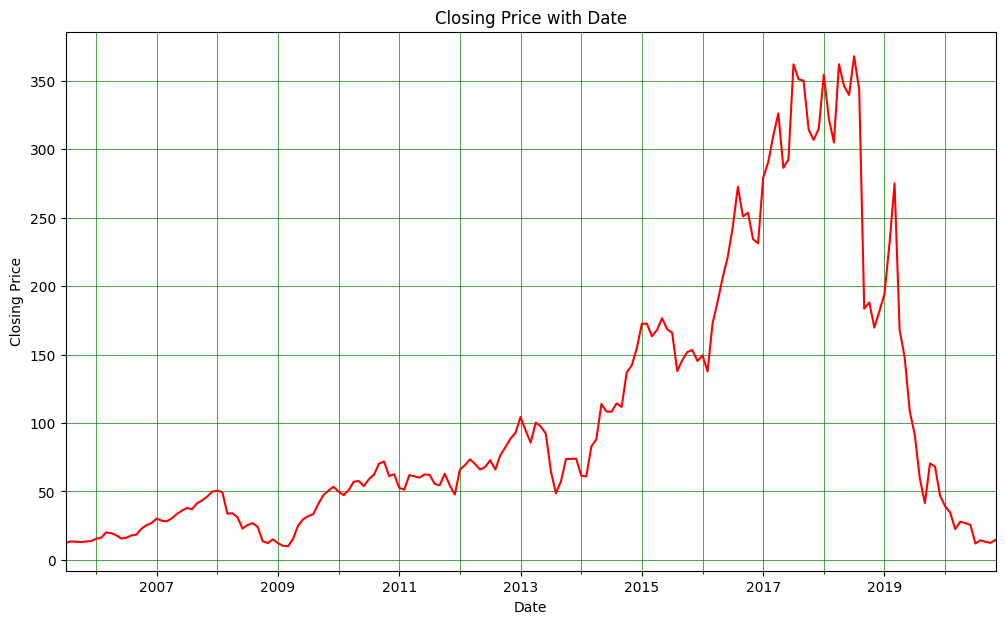

In [375]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 7))
YesBank_df['Close'].plot(color = 'r')
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = '-', linewidth = '0.5', color = 'green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')
plt.show

#### Chart - 14 - Correlation Heatmap

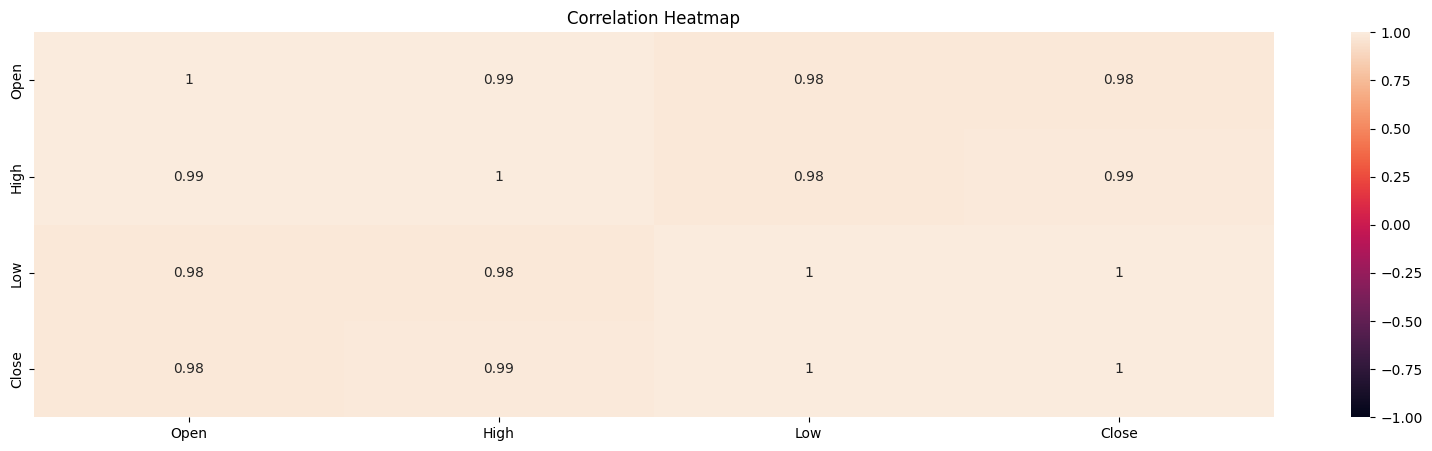

In [381]:
# Correlation Heatmap visualization code
# Check for existence of correlation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(YesBank_df.corr(), vmin = -1, cmap = None, annot = True)

##### 1. Why did you pick the specific chart?

**Heatmap can be used to explore the correlation between the closing price and the independent variables. By examining the heatmap, we can identify any patterns or relationships between the variables, which can inform the selection of appropriate ML algorithms for predicting the closing price.**

##### 2. What is/are the insight(s) found from the chart?

**From the heatmap above, we can clearly see that there is a very high correlation between each pair of features in our dataset. While it is desirable for the dependent variable to be highly correlated with independent variables, the independent varibles should ideally not have high correlation with one another.**

**This causes a problem for us as high correlation among independent variables (multicollinearity) is a problem for our models.**

#### Chart - 15 - Pair Plot

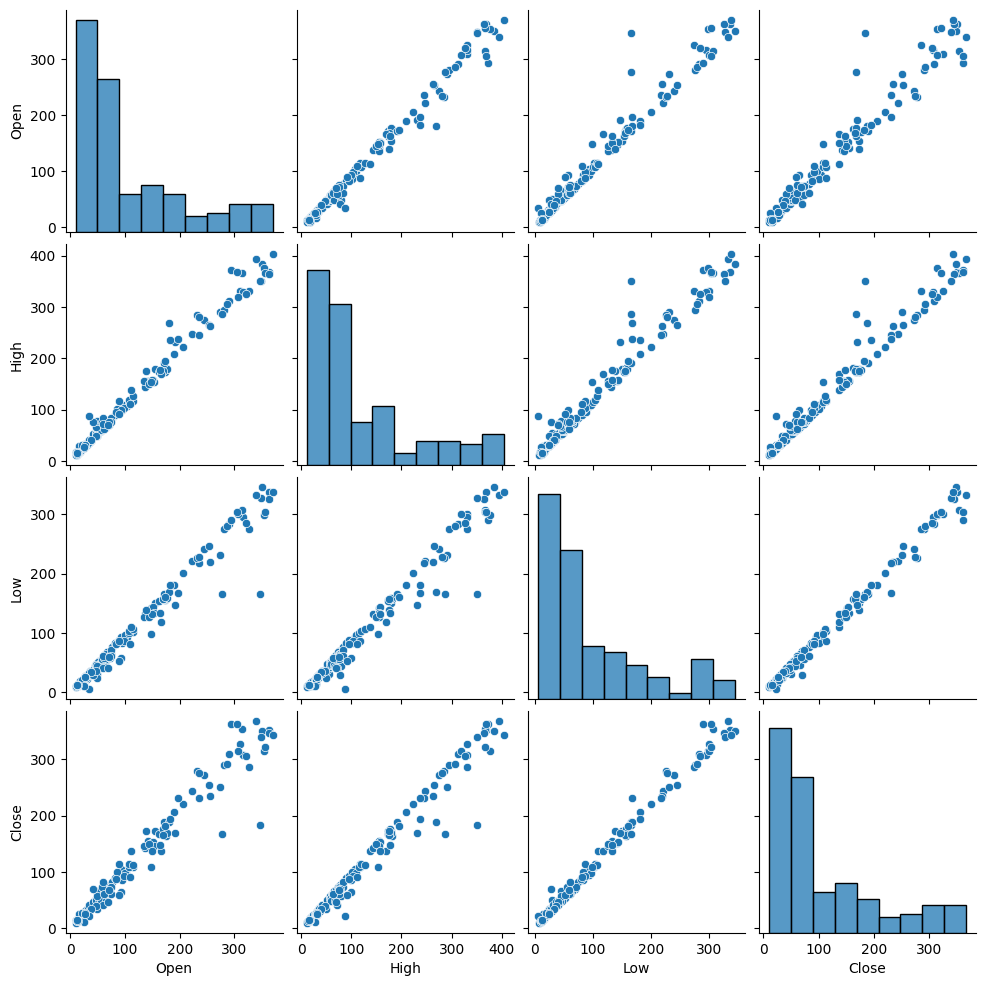

In [382]:
# Pair Plot visualization code
# Let's Visualise the relationship between each pair of variables using pair plots.

sns.pairplot(YesBank_df)

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [386]:
# Handling Missing Values & Missing Value Imputation
YesBank_df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

### 2. Handling Outliers

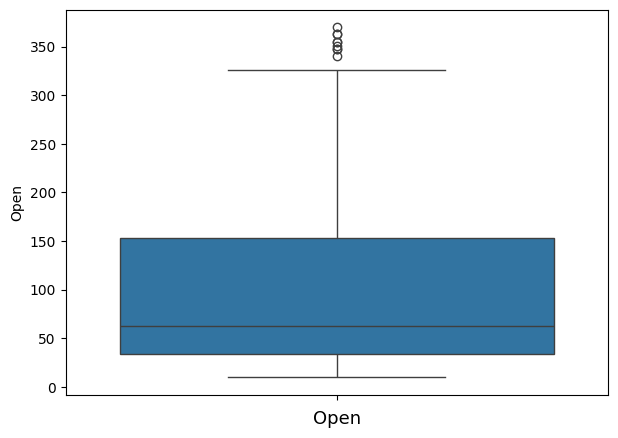

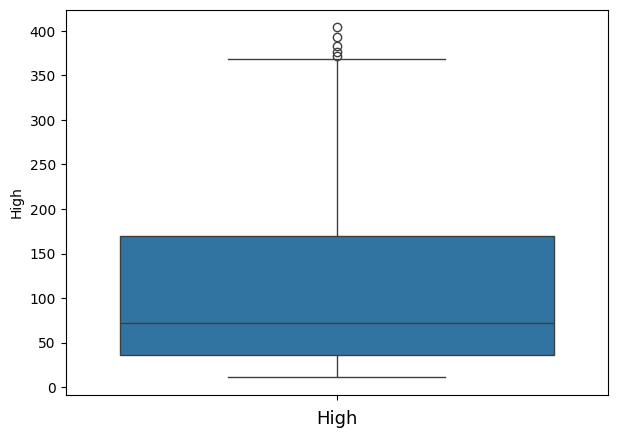

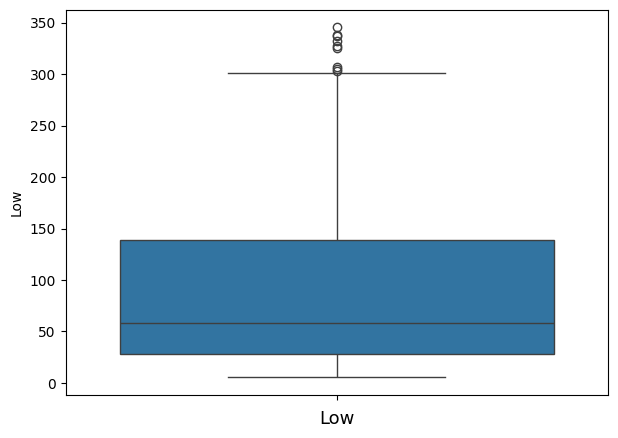

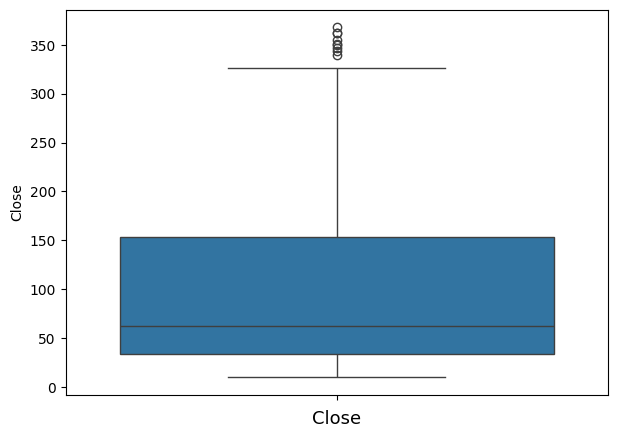

In [387]:
# Handling Outliers & Outlier treatments
for col in YesBank_df.columns:
  plt.figure(figsize=(7,5))
  sns.boxplot(YesBank_df[col])
  plt.xlabel(col, fontsize=13)
  plt.show

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [402]:
# Transform Your data
c_yesbank = YesBank_df.copy()
x = np.log10(c_yesbank.iloc[:,1:-1])
y = np.log10(c_yesbank['Close'])

### 6. Data Scaling

In [403]:
# Scaling your data

# Dealing with multicollinearity using VIF analysis.
# Calculating VIF to see the correlation between independent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

In [404]:
calc_vif(YesBank_df[[i for i in YesBank_df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


##### Which method have you used to scale you data and why?

**As we can see the values of VIF factor are very high. However since the dataset is so small and has just 3 independent features, multicollinearity is unavoidable here as any feature engineering will lead to loss of data/information.**

### 8. Data Splitting

In [406]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

(148, 2)
(37, 2)


##### What data splitting ratio have you used and why?

**Data Splitting is a common technique used in machine learning and data analysis to evaluate the performance of a model. In machine learning, we often split our data into two parts 80% for training the model and 20% for testing how well it works. This helps ensure our model is good at making predictions on new, unseen data. This is especially useful when dealing with large datasets and models that take a loAnswer Here.**

### 9. Handling Imbalanced Dataset

In [407]:
# Handling Imbalanced Dataset (If needed)
x = np.log10(c_yesbank.iloc[:,1:-1])
y = np.log10(c_yesbank['Close'])

## ***7. ML Model Implementation***

### ML Model - 1
Part 1 - Linear Regression

In [408]:
# ML Model - 1 Implementation
reg = LinearRegression()

# Fit the Algorithm
reg.fit(x_train, y_train)
# Predict on the model
y_pred = reg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [409]:
# Visualizing evaluation Metric Score chart

mse = mean_squared_error(10**(y_test),10**(y_pred))                   # 10** to convert back Log10 that we used while making it normalised
rmse = np.sqrt(mse)

r2 = r2_score(10**(y_test), 10**(y_pred))
Adjusted_R2 = (1-(1-r2_score(10**(y_test), 10**(y_pred))) * ((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MAE = mean_absolute_error(y_test, y_pred)

In [410]:
eval = pd.DataFrame([mse, rmse, r2, Adjusted_R2, MAE], columns = ['Linear'], index = ['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE'])
eval

,Linear
MSE,112.521954
RMSE,10.607637
R2,0.990003
Adj R2,0.989415
MAE,0.021381


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

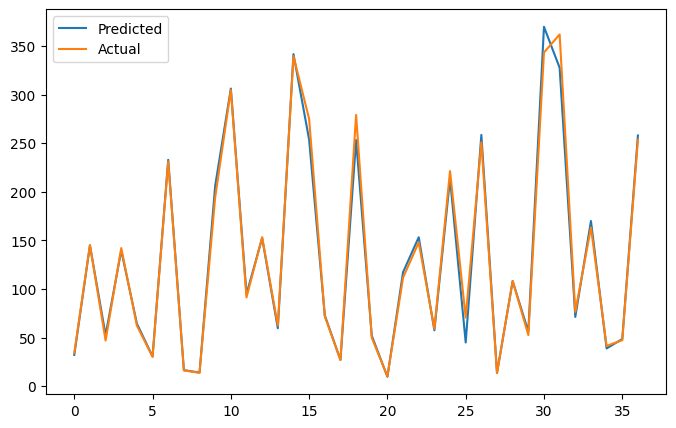

In [411]:
# Visualisation of Predicted and Actual Data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt

# Part 2 - Linear Regression using Lasso Regression

In [412]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_1 = lasso.predict(x_test)

In [413]:
mse_1 = mean_squared_error(10**(y_test),10**(y_pred_1))                   # 10** to convert back Log10 that we used while making it normalised
rmse_1 = np.sqrt(mse_1)

r2_1 = r2_score(10**(y_test), 10**(y_pred_1))
Adjusted_R2_1 = (1-(1-r2_score(10**(y_test), 10**(y_pred_1))) * ((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MAE_1 = mean_absolute_error(y_test, y_pred_1)

In [414]:
import pandas as pd

# Assuming you have existing 'eval' DataFrame

# Calculate evaluation results for the Lasso model
eval_1 = pd.DataFrame([mse_1, rmse_1, r2_1, Adjusted_R2_1, MAE_1], columns=['Lasso'], index=['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE'])

# Concatenate the results to the existing 'eval' DataFrame
eval = pd.concat([eval, eval_1], axis=1)

# Print or display the updated DataFrame
print(eval)


            Linear        Lasso
MSE     112.521954  8552.042521
RMSE     10.607637    92.477254
R2        0.990003     0.240217
Adj R2    0.989415     0.195524
MAE       0.021381     0.220050


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

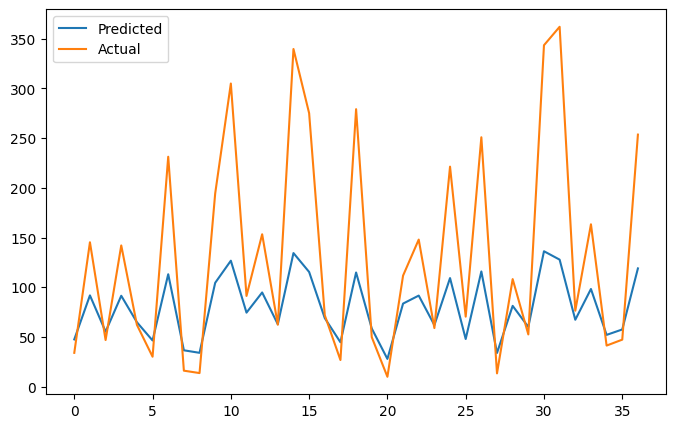

In [415]:
# Visualisation of Predicted and Actual Data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_1))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt

#### 2. Cross- Validation & Hyperparameter Tuning

In [462]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Create a Lasso regression model
lasso = Lasso()

# Define a range of alpha values for GridSearchCV to search through
parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# Create a GridSearchCV object with Lasso model, alpha parameter, and scoring metric
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV to find the best hyperparameter
lasso_regressor.fit(x_train, y_train)

# Get the best hyperparameter from the search
best_alpha = lasso_regressor.best_params_['alpha']

# Use the best hyperparameter to create the final Lasso model
final_lasso_model = Lasso(alpha=best_alpha)

# Fit the final model on the training data
final_lasso_model.fit(x_train, y_train)

# Predict on the test data
y_pred_lcv = final_lasso_model.predict(x_test)


In [463]:
print("The best fit Aplha value is :", lasso_regressor.best_params_)
print ("The negative means squared error is :", lasso_regressor.best_score_)

The best fit Aplha value is : {'alpha': 1e-05}
The negative means squared error is : -0.001835885608374374


In [464]:
mse_1cv = mean_squared_error(10**(y_test),10**(y_pred_lcv))                   # 10** to convert back Log10 that we used while making it normalised
rmse_1cv = np.sqrt(mse_1cv)

r2_1cv = r2_score(10**(y_test), 10**(y_pred_lcv))
Adjusted_R2_1cv = (1-(1-r2_score(10**(y_test), 10**(y_pred_lcv))) * ((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MAE_1cv = mean_absolute_error(y_test, y_pred_lcv)

In [465]:
Lasso_ridge = pd.DataFrame([mse_1cv, rmse_1cv, r2_1cv, Adjusted_R2_1cv, MAE_1cv], columns = ['Lasso CV'], index = ['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE'])
eval = pd.concat([eval, Lasso_ridge], axis = 1)
eval

,Linear,Lasso,Lasso CV,Lasso CV,Elastic Net,Ridge,Lasso CV
MSE,112.521954,8552.042521,112.472073,112.472073,113.721877,137.980909,112.472073
RMSE,10.607637,92.477254,10.605285,10.605285,10.664046,11.746528,10.605285
R2,0.990003,0.240217,0.990008,0.990008,0.989897,0.987741,0.990008
Adj R2,0.989415,0.195524,0.989420,0.989420,0.989302,0.987020,0.989420
MAE,0.021381,0.220050,0.021372,0.021372,0.021252,0.022718,0.021372


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

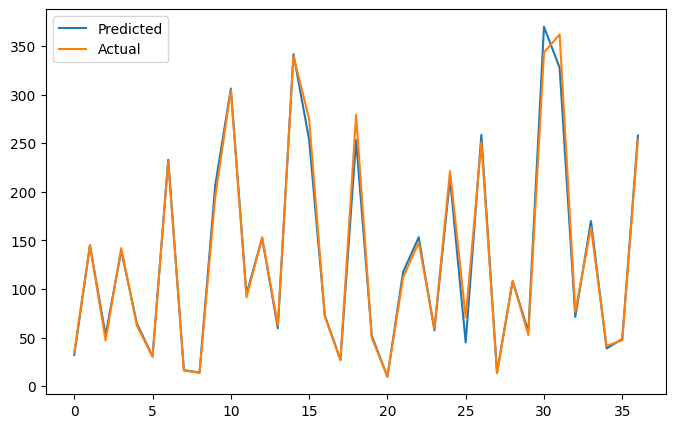

In [420]:
# Visualisation of Predicted and Actual Data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lcv))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt

### ML Model - 2

*Elastic-Net Regression*

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [421]:
# Visualizing evaluation Metric Score chart

# Importing and initializing Elastic-Net Regression.

from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.01)

# Initializing Parameter Grid.

elastic_net_param_grid = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 0.01, 0.02, 0.03, 0.04, 1, 5, 10, 20, 40, 50, 60, 100], 'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
elastic_net_model.fit(x_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.01)

In [422]:
elasticnet_regressor = GridSearchCV(elastic_net_model, elastic_net_param_grid, scoring='neg_mean_squared_error', cv=3)
elasticnet_regressor.fit(x_train, y_train)
y_pred_elastic_net = elasticnet_regressor.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.303e-02, tolerance: 1.729e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.269e-02, tolerance: 1.729e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.234e-02, tolerance: 1.729e

In [423]:
# Visualizing evaluation Metric Score chart

mse_elastic_net = mean_squared_error(10**(y_test),10**(y_pred_elastic_net))                   # 10** to convert back Log10 that we used while making it normalised
rmse_elastic_net = np.sqrt(mse_elastic_net)

r2_elastic_net = r2_score(10**(y_test), 10**(y_pred_elastic_net))
Adjusted_R2_elastic_net = (1-(1-r2_score(10**(y_test), 10**(y_pred_elastic_net))) * ((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MAE_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)

In [424]:
elastic_net_metric_list = pd.DataFrame([mse_elastic_net, rmse_elastic_net, r2_elastic_net, Adjusted_R2_elastic_net, MAE_elastic_net], columns = ['Elastic Net'], index = ['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE'])
elastic_net_metric_list

,Elastic Net
MSE,113.721877
RMSE,10.664046
R2,0.989897
Adj R2,0.989302
MAE,0.021252


Text(0.5, 1.0, 'Actual vs Predicted Closing Price Elastic Net Regression')

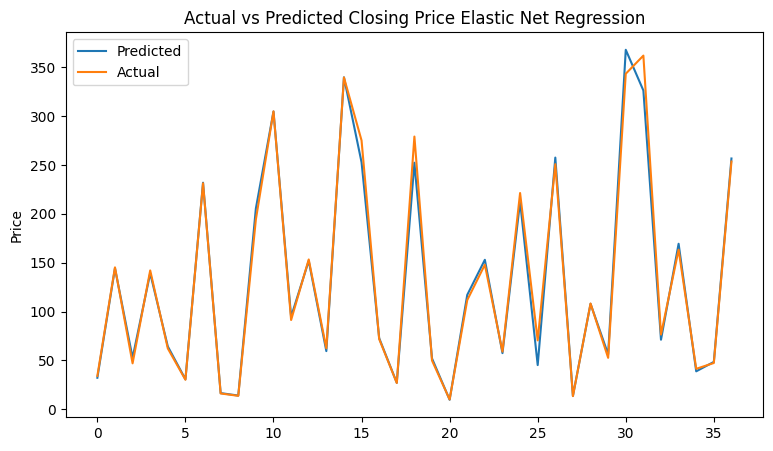

In [425]:
plt.figure(figsize=(9,5))
plt.plot(10**(y_pred_elastic_net))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted", "Actual"])
plt.ylabel("Price")
plt.title ("Actual vs Predicted Closing Price Elastic Net Regression")


#### 2. Cross- Validation & Hyperparameter Tuning

In [426]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

elasticnet_regressor = GridSearchCV(elastic_net_model, elastic_net_param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm

elasticnet_regressor.fit(x_train, y_train)

# Predict on the model

elasticnet_regressor

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.303e-02, tolerance: 1.729e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.269e-02, tolerance: 1.729e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.234e-02, tolerance: 1.729e

GridSearchCV(cv=3, estimator=ElasticNet(alpha=0.1, l1_ratio=0.01),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.02, 0.03, 0.04, 1, 5, 10, 20,
                                   40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [427]:
# Finding the best score for the optimal parameter.

elasticnet_regressor.best_score_

-0.0016816002821011388

In [428]:
# Finding the best Parameter

elasticnet_regressor.best_params_

{'alpha': 0.001, 'l1_ratio': 0.1}

In [429]:
# Making the predicitions.

y_pred_elastic_net = elasticnet_regressor.predict(x_test)

### ML Model - 3

*   Ridge Regression



In [432]:
# ML Model - 3 Implementation

ridge = Ridge()

# Fit the Algorithm

ridge_param_grid = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37, 1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge.fit(x_train, y_train)


# Predict on the model

y_pred_ridge = ridge.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [433]:
# Visualizing evaluation Metric Score chart

mse_ridge = mean_squared_error(10**(y_test),10**(y_pred_ridge))                   # 10** to convert back Log10 that we used while making it normalised
rmse_ridge = np.sqrt(mse_ridge)

r2_ridge = r2_score(10**(y_test), 10**(y_pred_ridge))
Adjusted_R2_ridge = (1-(1-r2_score(10**(y_test), 10**(y_pred_ridge))) * ((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)

In [434]:
ridge_regressor_list = pd.DataFrame([mse_ridge, rmse_ridge, r2_ridge, Adjusted_R2_ridge, MAE_ridge], columns = ['Ridge'], index = ['MSE', 'RMSE', 'R2', 'Adj R2', 'MAE'])
ridge_regressor_list

,Ridge
MSE,137.980909
RMSE,11.746528
R2,0.987741
Adj R2,0.987020
MAE,0.022718


#### 2. Cross- Validation & Hyperparameter Tuning

In [435]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm

ridge_regressor.fit(x_train, y_train)

# Predict on the model

ridge_regressor

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [436]:
# Finding the best parameter value for alpha

ridge_regressor.best_params_

{'alpha': 0.3}

In [437]:
# Getting the best score for optimal valiue for alpha.

ridge_regressor.best_score_

-0.0015964965805823127

Text(0.5, 1.0, 'Actual vs Predicted Closing Price Ridge Regression')

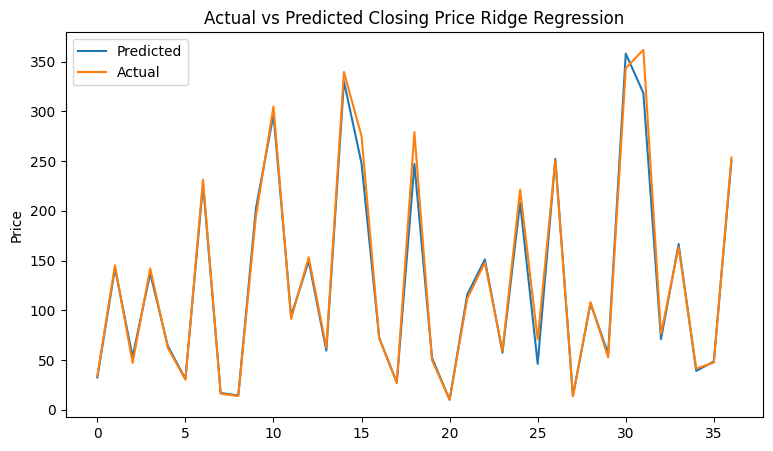

In [438]:
# Plotting predicted and actual target variables values.

plt.figure(figsize=(9,5))
plt.plot(10**(y_pred_ridge))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted", "Actual"])
plt.ylabel("Price")
plt.title ("Actual vs Predicted Closing Price Ridge Regression")



In [439]:
# Comparing the performance of all models that we have implemented.
eval = pd.concat([eval, Lasso_ridge, elastic_net_metric_list, ridge_regressor_list], axis = 1)
eval

,Linear,Lasso,Lasso CV,Lasso CV,Elastic Net,Ridge
MSE,112.521954,8552.042521,112.472073,112.472073,113.721877,137.980909
RMSE,10.607637,92.477254,10.605285,10.605285,10.664046,11.746528
R2,0.990003,0.240217,0.990008,0.990008,0.989897,0.987741
Adj R2,0.989415,0.195524,0.989420,0.989420,0.989302,0.987020
MAE,0.021381,0.220050,0.021372,0.021372,0.021252,0.022718


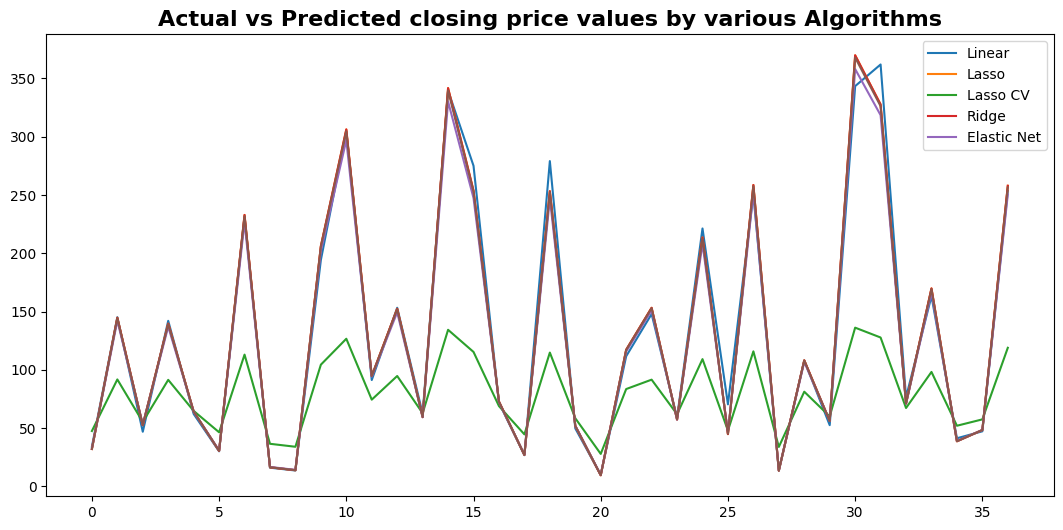

In [466]:
# Plotting the predicted values of all the models against the true values.

plt.figure(figsize=(13,6))
plt.plot(np.array(10**(y_test)))
plt.plot(10**y_pred)
plt.plot(10**y_pred_1)
plt.plot(10**y_pred_lcv)
plt.plot(10**y_pred_ridge)
plt.plot(10**y_pred_elastic_net)
plt.legend(['Linear','Lasso','Lasso CV','Ridge','Elastic Net'])
plt.title('Actual vs Predicted closing price values by various Algorithms', weight='bold',fontsize=16)
plt.show()

**As we can see from above graph all our models performing well and are able to closely predict the actual values.**

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [457]:
# Save the File
best_model = Lasso(alpha=0.01)
best_model.fit(x_train, y_train)
import joblib
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [458]:
# Load the File and predict unseen data.
model = joblib.load('best_model.joblib')
model.predict(x_test)

array([1.52611051, 2.14136976, 1.71759079, 2.1285028 , 1.8107664 ,
       1.50511751, 2.33604   , 1.25701256, 1.18939906, 2.2823264 ,
       2.44711578, 1.96464332, 2.16391212, 1.77939799, 2.49354245,
       2.36848431, 1.86279255, 1.45711878, 2.36718219, 1.7222196 ,
       1.03175695, 2.05506687, 2.16077806, 1.76505892, 2.3010799 ,
       1.64214097, 2.37564412, 1.18121338, 2.02317646, 1.75272222,
       2.52277244, 2.47160555, 1.85130384, 2.20667917, 1.60409357,
       1.69547235, 2.37867565])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

                  

*   ***Leveraging data visualization on our target variable shows the significant impact of the 2018 fraud case involving Rana Kapoor, as stock prices witnessed a remarkable and unexpected decline during that period.***
*   ***Upon dataset loading, the absence of null values or duplicate entries was verified, ensuring the integrity of our data.***

*   ***Despite the existence of outliers in our features, a startegic decision was made to retain them due to dataset's limited size, prioritizing information retention over the removal of outliers.***
*   ***Observing positive skewness in the distrubution of all variables prompted the application of log transformation to achieve a more normalised distribution.***

*   ***There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted acurately from them.***
*   **We found that there is a rather high correlation between our independent variables. This multicollinearity is however anavoidable here as the dataset is very small.**

*   ***We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and Lasso Regressor is the best performing model with Adjusted R2 score value of 0.9894 and scores well on all evaluation metrics.***
*   ***All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 98%.***

*   ***With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.***




##                             **THANK YOU**                                  












### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***